In [4]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

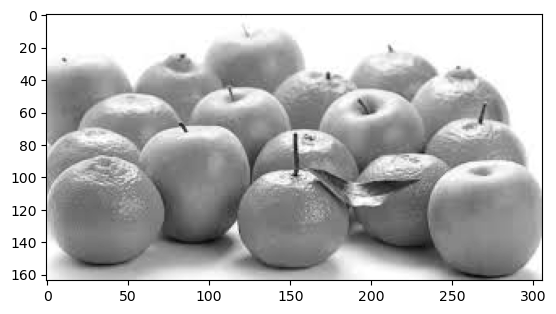

In [7]:
image = cv2.imread('./images.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

In [11]:
image.shape

(164, 306)

In [31]:
# Apply Gaussian filter
def gaussian_filter(sigma, filter_shape):
    m, n = filter_shape
    m_half = m // 2
    n_half = n // 2

    gaussian_filter = np.zeros((m, n), np.float32)
    minval = 100

    for y in range(-m_half, m_half+1):
        for x in range(-n_half, n_half+1):
            normal = 1 / (2.0 * np.pi * sigma**2.0)
            exp_term = np.exp(-(x**2.0 + y**2.0) / (2.0 * sigma**2.0))
            gaussian_filter[y+m_half, x+n_half] = normal * exp_term
            minval = min(minval, normal*exp_term)
    
    for y in range(-m_half, m_half+1):
        for x in range(-n_half, n_half+1):
            gaussian_filter[y+m_half, x+n_half] /= minval
            gaussian_filter[y+m_half, x+n_half] = round(gaussian_filter[y+m_half, x+n_half])
    return gaussian_filter

def convolution(image, kernel):
    if len(image.shape) == 2:
        image = image[..., np.newaxis]
    m_i, n_i, c_i = image.shape
    m_k, n_k = kernel.shape
    y_strides = m_i - m_k + 1 
    x_strides = n_i - n_k + 1

    img = image.copy()
    output_shape = (m_i-m_k+1, n_i-n_k+1, c_i)
    output = np.zeros(output_shape, dtype=np.float32)

    count = 0  # taking count of the convolution operation being happening

    output_tmp = output.reshape(
        (output_shape[0]*output_shape[1], output_shape[2])
    )

    for i in range(y_strides):
        for j in range(x_strides):
            for c in range(c_i): # looping over the all channels
                sub_matrix = img[i:i+m_k, j:j+n_k, c]

                output_tmp[count, c] = np.sum(sub_matrix * kernel)

            count += 1

    output = output_tmp.reshape(output_shape)

    return output

gaussian_kernel = gaussian_filter(1, [5,5])
print(gaussian_kernel)
gaussian_filtered_image = convolution(image, gaussian_kernel)

[[ 1.  4.  7.  4.  1.]
 [ 4. 20. 33. 20.  4.]
 [ 7. 33. 55. 33.  7.]
 [ 4. 20. 33. 20.  4.]
 [ 1.  4.  7.  4.  1.]]


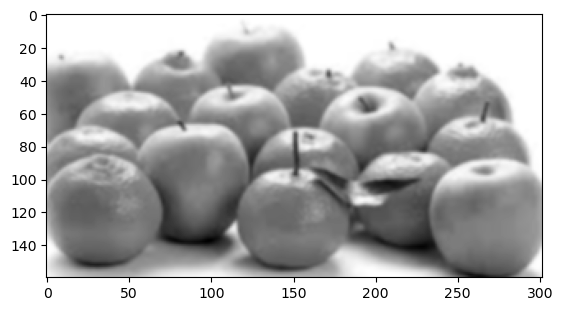

In [32]:
plt.imshow(gaussian_filtered_image, cmap='gray')

In [34]:
#Sobel filter

def sobel(image, filter):
    imagex = convolution(image, filter)
    imagey = convolution(image, np.flip(filter.T, axis=0))

    gradient_magnitude = np.sqrt(np.square(imagex) + np.square(imagey))

    gradient_magnitude *= 255.0 / gradient_magnitude.max()

    return gradient_magnitude

sobel_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_filtered_image = sobel(gaussian_filtered_image, sobel_kernel)

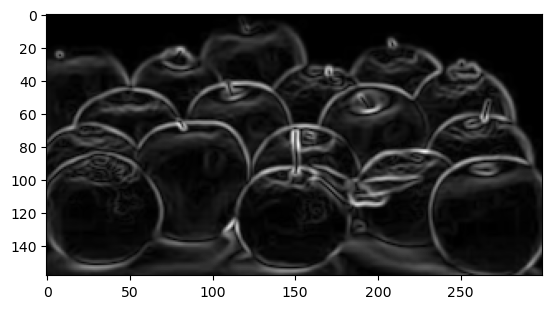

In [35]:
plt.imshow(sobel_filtered_image, cmap='gray')

In [ ]:
# Non-max Supression
